## Explatory Data Analysis (EDA)

---


### ([Pour zoomer dans l'image de Synthèse](img/Synthèse.png))

![alt text](img\Synthèse.png)


L'objective de ce notebook est de découvrire notre jeux de données et extraire les problèmatiques qu'on doit traiter

## Importation des librairies

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Visualisation et analyse de notre dataset

In [8]:
df = pd.read_csv(r'data\trainset.csv')
df

,product_id,category_id,category_path,main_image_id,secondary_image_id
0,b82e6254-3ec9-46a2-b8f7-b5929e035496,9f851daf,db6e4514/9699ae0b/0fc18ec1/ac2aef7a/9f851daf,fea69231-ebb4,658ca173-9caa
1,43e37281-92dd-4b16-9ccd-fca0d095568d,068c35b0,db6e4514/9699ae0b/0fc18ec1/4d8a5187/b9e4f158/0...,6d1f2537-032a,a815d5b4-a8c0
2,7d9c8f22-0d2c-4c13-aed8-071d9aefb5b3,f7ac9307,db6e4514/9699ae0b/0fc18ec1/ac2aef7a/f7ac9307,f571dad3-6b0d,82194909-b4ad
3,07d66a64-d8a2-4f87-8b37-b063aad33b9d,92df953a,db6e4514/d8d2ce05/5ba4aaaa/2f35b995/92df953a,b741aa90-0c27,d246e435-b7e5
4,db7c0046-f9e1-4a7e-865c-e0a6dcd90086,5af8e010,db6e4514/c225693c/ea17ab48/ab190885/1f310b6a/1...,6a759b3d-54c1,d8561940-c744
...,...,...,...,...,...
9995,d97e21d6-ba3e-430e-a257-78102f63d740,83185036,db6e4514/9699ae0b/0fc18ec1/2bf38614/154e0cb5/8...,1ffd928c-80b3,9a79dcce-0f5d
9996,915682d6-0cb7-4f66-9abf-6b64b6479adb,54a9c08e,db6e4514/9699ae0b/0fc18ec1/4aa2b4eb/54a9c08e,4daa930f-9f5f,8ea81658-8764
9997,d9dd41a3-e896-489b-b841-6066bf16378d,bb743b7b,db6e4514/c225693c/ea17ab48/ab190885/cb84ddc8/f...,1cd8ce66-d2fa,511ed9ee-c6f5
9998,fd06d6ed-16e2-4675-8c82-972c47eafac4,417f81d7,db6e4514/928d326d/b145f96e/1c3a1671/9ec92cce/4...,31ef81dd-2a01,5111d1dc-7526


In [13]:
# Check for null or NaN values in the dataset
null_summary = df.isnull().sum()

dataset_summary = df.describe(include='all')

print("Null or NaN values in each column:")
print(null_summary)
print("\nDataset summary:")
print(dataset_summary)


Null or NaN values in each column:
product_id               0
category_id              0
category_path            0
main_image_id           16
secondary_image_id    2703
dtype: int64

Dataset summary:
                                  product_id category_id  \
count                                  10000       10000   
unique                                 10000         100   
top     90c4b16d-4625-4bf8-809f-03ca16218b63    be737efb   
freq                                       1         151   

                              category_path  main_image_id secondary_image_id  
count                                 10000           9984               7297  
unique                                  100           9758               7102  
top     db6e4514/1def83d5/1c71253d/be737efb  a7b9db3a-946c      38e3f36b-5903  
freq                                    151             14                 15  


## Observations:
---
### Null Values:
- main_image_id has 16 missing values.
- secondary_image_id has 2,703 missing values.
### Category Distribution:
- The category_id column has 100 unique categories. (100 classes)
- The most frequent category (be737efb) appears 151 times.
### Images:
- Not all products have images, as indicated by the count of non-null entries in main_image_id and secondary_image_id.
---

In [44]:

no_image_df = df[df['main_image_id'].isnull() & df['secondary_image_id'].isnull()]
print("Nombre de product id sans main image id et sans secondary_image_id:", len(no_image_df))
no_image_df

Nombre de product_id sans main_image_id et sans secondary_image_id: 10


,product_id,category_id,category_path,main_image_id,secondary_image_id
1414,060531ae-fb69-4cff-8d33-3ab046fecb8b,8533bd65,db6e4514/c225693c/ea17ab48/ab190885/cb84ddc8/d...,NaN,NaN
1576,f4a505d7-9549-472a-af5a-a684d491bc65,be737efb,db6e4514/1def83d5/1c71253d/be737efb,NaN,NaN
2231,1b2e7e6e-2dfa-4796-a735-813fcd902cc7,f0dcbb20,db6e4514/1def83d5/1c71253d/f0dcbb20,NaN,NaN
2880,847fb237-eb97-46ae-98a8-36a5873b878e,93abc891,db6e4514/9699ae0b/0fc18ec1/195e53a6/93f8da7d/9...,NaN,NaN
3268,e61dc637-22ae-4084-90ff-18e4a3beaf0b,9d34cc1c,db6e4514/1def83d5/1c71253d/98d0ce3e/9d34cc1c,NaN,NaN
3438,ffa2a3e3-5f04-433b-b43c-ca969247170c,9d34cc1c,db6e4514/1def83d5/1c71253d/98d0ce3e/9d34cc1c,NaN,NaN
4275,d0782f55-8d4d-4bde-943b-bc0fc9e3d1df,98d0ce3e,db6e4514/1def83d5/1c71253d/98d0ce3e,NaN,NaN
6627,008b2e85-b9a0-408d-b2ea-aec26d82046a,235a9267,db6e4514/1def83d5/1c71253d/235a9267,NaN,NaN
8972,30e31536-e140-4dff-9bee-05cb7230b0e9,f0dcbb20,db6e4514/1def83d5/1c71253d/f0dcbb20,NaN,NaN
9905,756aef29-61ef-483d-af6e-bad4d55ae6e2,f0dcbb20,db6e4514/1def83d5/1c71253d/f0dcbb20,NaN,NaN


In [45]:
#count of product_id that has both main_image and secondary_image
count_both_images = df[df['main_image_id'].notnull() & df['secondary_image_id'].notnull()].shape[0]

#count of product_id that has main_image but not secondary_image
count_main_only = df[df['main_image_id'].notnull() & df['secondary_image_id'].isnull()].shape[0]

#count of product_id that has no main_image but has secondary_image
count_secondary_only = df[df['main_image_id'].isnull() & df['secondary_image_id'].notnull()].shape[0]

#count of product_id that has neither main_image nor secondary_image
count_neither_images = df[df['main_image_id'].isnull() & df['secondary_image_id'].isnull()].shape[0]

print(f"Count of product_id with both main and secondary images: {count_both_images}")
print(f"Count of product_id with main image but not secondary image: {count_main_only}")
print(f"Count of product_id with no main image but with secondary image: {count_secondary_only}")
print(f"Count of product_id with neither main image nor secondary image: {count_neither_images}")


Count of product_id with both main and secondary images: 7291
Count of product_id with main image but not secondary image: 2693
Count of product_id with no main image but with secondary image: 6
Count of product_id with neither main image nor secondary image: 10


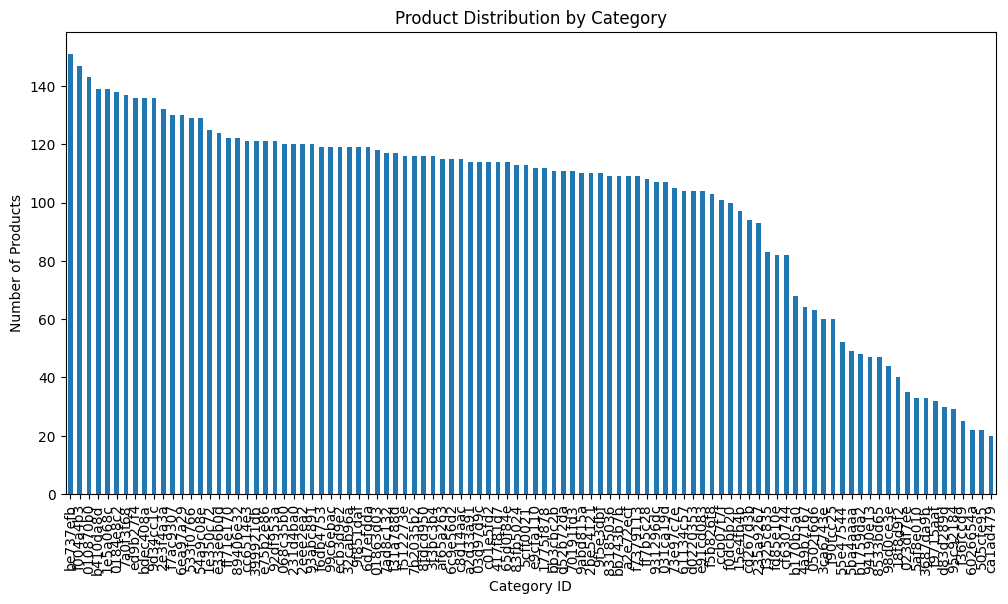

In [11]:
import matplotlib.pyplot as plt

#count the number of product_id for each category_id
category_counts = df['category_id'].value_counts()

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Product Distribution by Category')
plt.xlabel('Category ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()


## Visualisation de la classe majoritaire

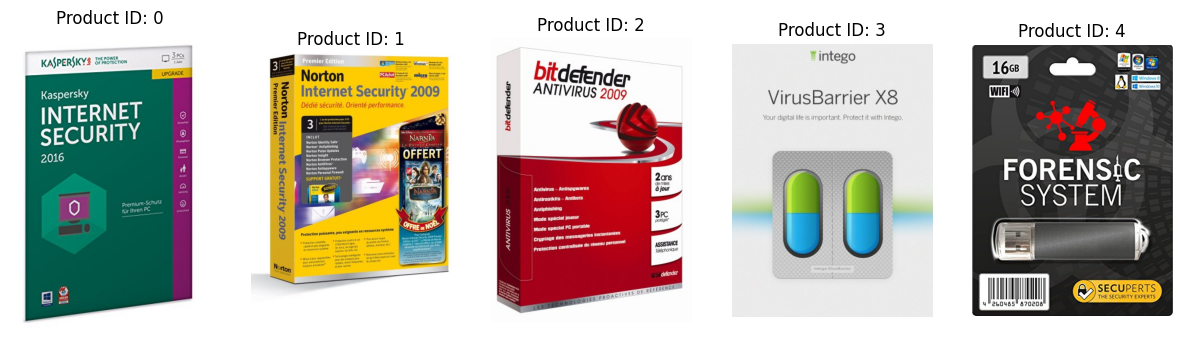

: 

In [50]:
import matplotlib.pyplot as plt
from PIL import Image

# identify the most frequent category
most_frequent_category = category_counts.idxmax()

#Filter the dataset for this category
most_frequent_df = df[df['category_id'] == most_frequent_category]

sample_images = most_frequent_df.sample(n=5)

plt.figure(figsize=(15, 10))
for i, row in enumerate(sample_images.itertuples()):
    main_image_path = os.path.join('all_images/', f"{row.main_image_id}.jpg")
    try:
        main_image = Image.open(main_image_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(main_image)
        plt.title(f"Product ID: {i}")
        plt.axis('off')
    except FileNotFoundError:
        print(f"Image not found: {main_image_path}")

plt.show()


## Visualisation des autres produits avec leur main image et secondary image

Secondary image not found: all_images/nan.jpg
Secondary image not found: all_images/nan.jpg


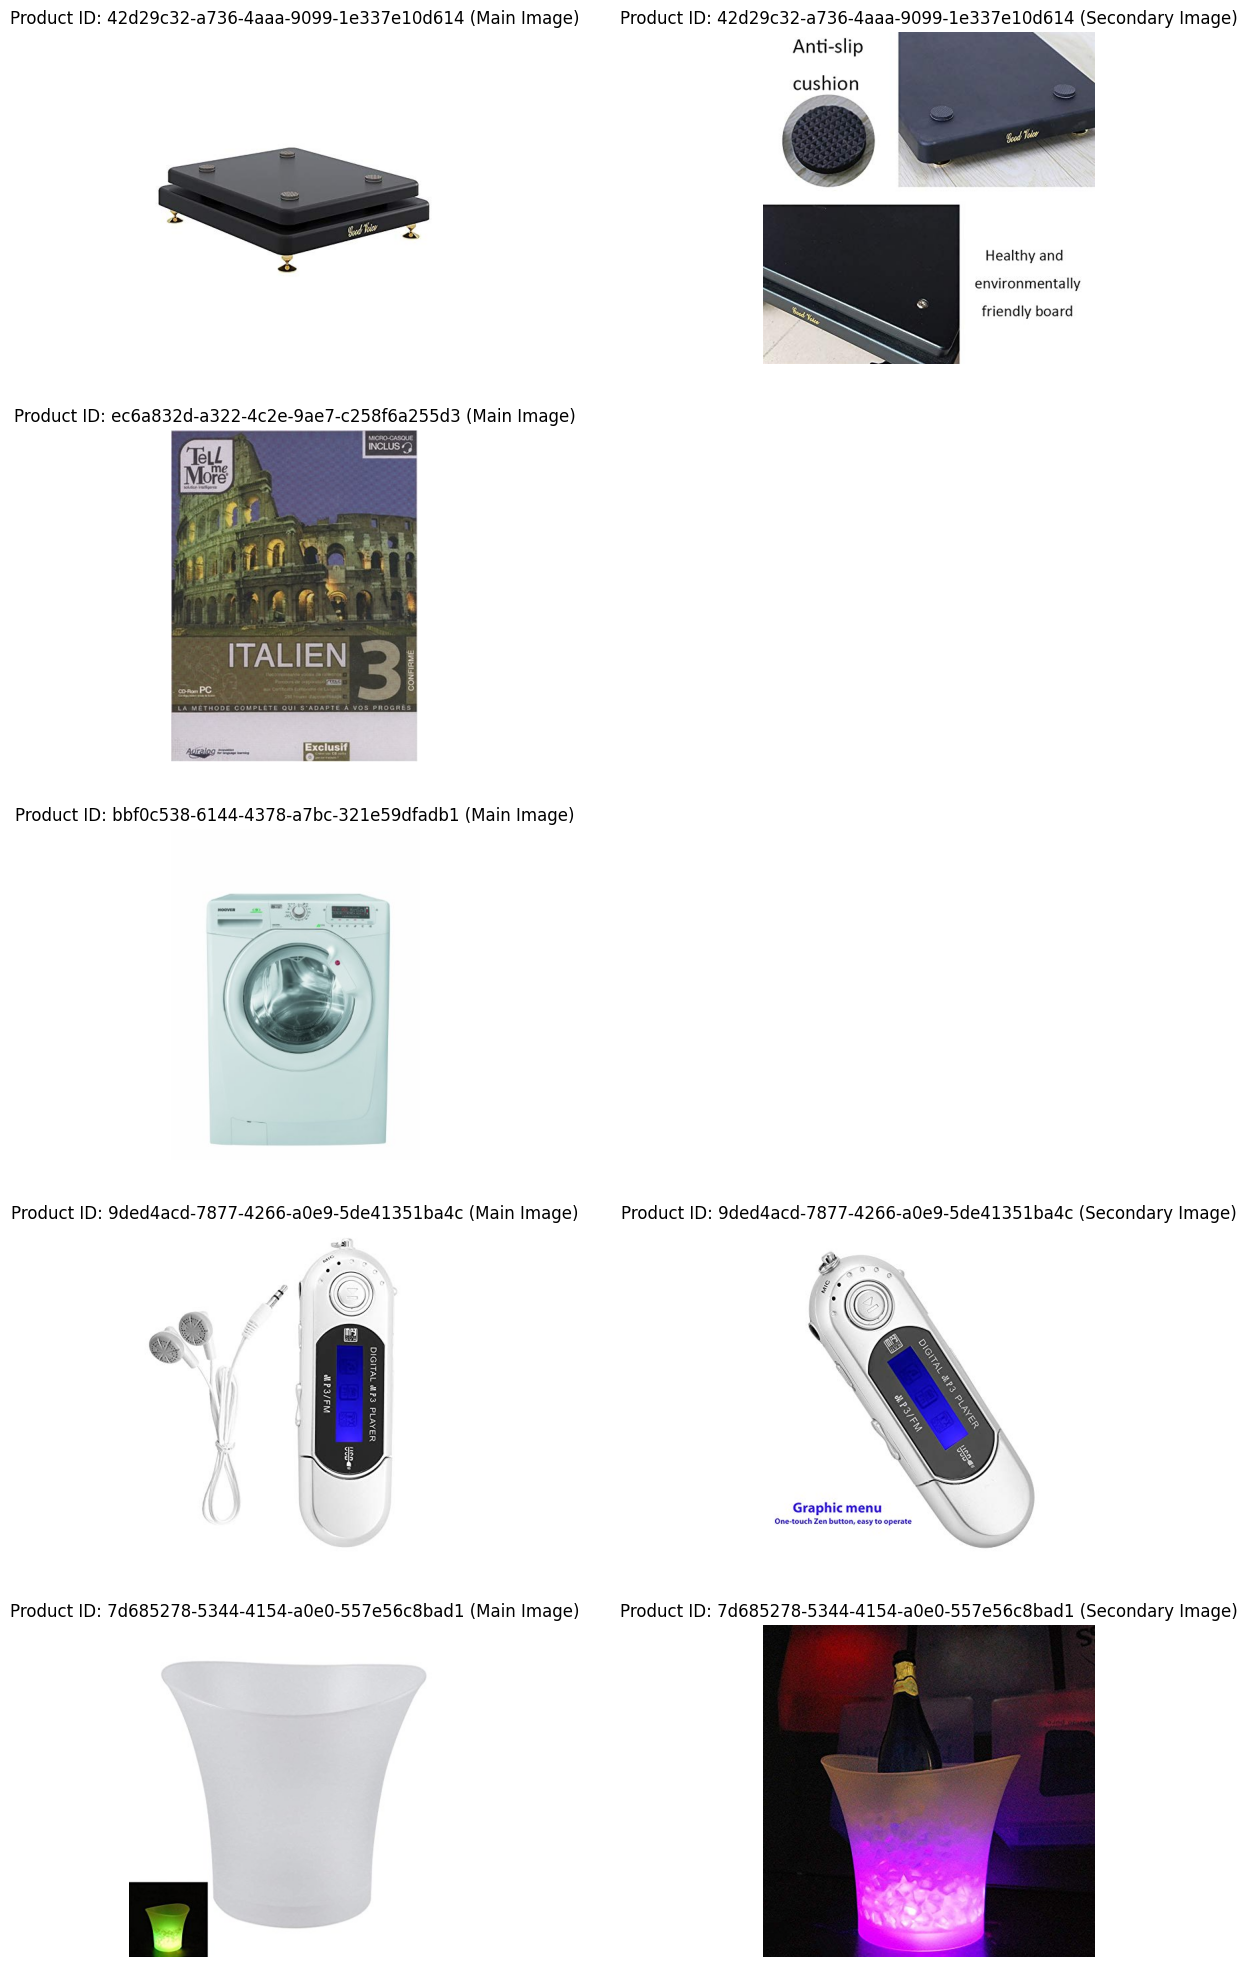

In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Function to plot images with their product_id
def plot_images_with_product_ids(df, image_folder, num_images=5):
    subset = df.sample(n=num_images)

    # Create a plot
    plt.figure(figsize=(15, 5 * num_images))

    for idx, row in enumerate(subset.itertuples(), 1):
        main_image_path = os.path.join(image_folder, f"{row.main_image_id}.jpg")
        secondary_image_path = os.path.join(image_folder, f"{row.secondary_image_id}.jpg")

        try:
            main_image = Image.open(main_image_path)
            plt.subplot(num_images, 2, 2 * idx - 1)
            plt.imshow(main_image)
            plt.title(f"Product ID: {row.product_id} (Main Image)")
            plt.axis('off')
        except FileNotFoundError:
            print(f"Main image not found: {main_image_path}")

        try:
            secondary_image = Image.open(secondary_image_path)
            plt.subplot(num_images, 2, 2 * idx)
            plt.imshow(secondary_image)
            plt.title(f"Product ID: {row.product_id} (Secondary Image)")
            plt.axis('off')
        except FileNotFoundError:
            print(f"Secondary image not found: {secondary_image_path}")

    plt.show()

plot_images_with_product_ids(df, 'all_images/', num_images=5)


## Syhthèse

---

### Synthèse des Problèmes à Résoudre dans le Dataset

1. **Valeurs Manquantes**:
   - **`main_image_id`**: 16 produits manquent d'images principales. Sans `main_image_id`, il est impossible de fournir une entrée visuelle pour l'entraînement du modèle.
   - **`secondary_image_id`**: 2703 produits manquent d'images secondaires. Cela indique une dépendance inégale entre les images principales et secondaires, ce qui complique l'utilisation des deux types d'images pour la classification.

2. **Images Absentes dans le Répertoire**:
   - Les identifiants d'images référencés dans le dataset (`main_image_id` et `secondary_image_id`) peuvent ne pas correspondre à des fichiers d'image existants dans le répertoire des images. Cela entraînerait des erreurs lors du chargement des images pour le modèle.

3. **Déséquilibre des Catégories**:
   - Le dataset contient 100 catégories, mais leur distribution est inégale. Certaines catégories ont beaucoup d'images, tandis que d'autres en ont très peu. Cela peut entraîner un biais du modèle vers les catégories les plus fréquentes.

4. **Taille Incohérente des Images**:
   - Les images du dataset sont probablement de tailles variées. Les modèles de deep learning nécessitent des entrées de taille fixe, ce qui rend le redimensionnement des images indispensable.
   
5. **Absence de Normalisation des Images**:
   - Les images brutes contiennent des valeurs de pixel non normalisées. Les modèles de classification d'images fonctionnent mieux lorsque les valeurs des pixels sont normalisées, sinon cela peut ralentir l'entraînement et affecter la performance du modèle.

6. **Données Non Exploitables**:
   - Les produits sans aucune image (`main_image_id` et `secondary_image_id` manquants) ne peuvent pas être utilisés pour la classification basée sur les images. Leur présence dans le dataset est inutile pour la tâche cible.

### Justification de l'Étape de Prétraitement
Ces problèmes démontrent clairement que le prétraitement est obligatoire pour:
- **Nettoyer et filtrer les données**: Éliminer les entrées sans images exploitables et s'assurer que seules les images existantes sont incluses dans l'ensemble d'entraînement.
- **Harmoniser les images**: Redimensionner et normaliser les images pour rendre les données cohérentes avec les exigences du modèle de deep learning.
- **Améliorer la qualité de l'entraînement**: Gérer les déséquilibres de catégories et augmenter la diversité des données pour améliorer la robustesse du modèle.

Sans une étape de prétraitement soigneusement planifiée, le modèle risque d'être confronté à des erreurs, à une mauvaise performance, et à une faible capacité de généralisation.